In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
abbrev = pd.read_csv("../cleaned_data2/abbrev.csv", sep=";")

In [64]:
chemicals = abbrev.drop(labels=["ndb", "Shrt_Desc", "Refuse_Pct", "GmWt_1", "GmWt_Desc1", "GmWt_2", "GmWt_Desc2"], axis=1)
for column in chemicals.columns:
    chemicals[column] = chemicals[column].apply(lambda x: x if type(x) != str else float(x.replace(",", ".")))

(array([ 1.,  1.,  0.,  4.,  3., 10.,  7.,  6.,  7.,  7.]),
 array([0.08596594, 0.17736802, 0.2687701 , 0.36017218, 0.45157425,
        0.54297633, 0.63437841, 0.72578049, 0.81718257, 0.90858465,
        0.99998672]),
 <a list of 10 Patch objects>)

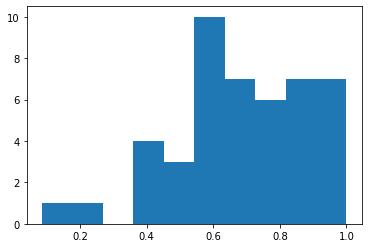

In [66]:
corr = chemicals.corr()
largest_corr = []
for column in chemicals.columns:
    largest_corr.append(corr[column].apply(abs).nlargest(2)[1])
plt.hist(largest_corr)

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
imputer = SimpleImputer(strategy="mean")
reg = LinearRegression()

In [68]:
r2 = []
for column in chemicals.columns:
    curr_chemicals = chemicals.dropna(subset=[column])
    dependent_variables = imputer.fit_transform(curr_chemicals.drop(columns=[column]))
    reg.fit(dependent_variables, curr_chemicals[column])
    r2.append(reg.score(dependent_variables, curr_chemicals[column]))

In [69]:
sum(r2) / len(r2)

0.7356160100043094

(array([ 1.,  1.,  2.,  1.,  2.,  8.,  6.,  3.,  3., 19.]),
 array([0.03059354, 0.12753156, 0.22446959, 0.32140762, 0.41834564,
        0.51528367, 0.6122217 , 0.70915972, 0.80609775, 0.90303577,
        0.9999738 ]),
 <a list of 10 Patch objects>)

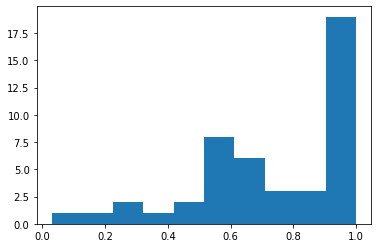

In [70]:
plt.hist(r2)